In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme()


In [60]:
df = pd.read_csv('research_result.csv')

In [34]:
df.head()


,Layer_primary,Layer_secondary,Frozen Percentage,FC Network,Accuracy,F1,TYPE
0,12.0,NaN,0.0,NaN,0.858036,0.782345,Layer
1,11.0,NaN,0.0,NaN,0.862500,0.798365,Layer
2,10.0,NaN,0.0,NaN,0.852679,0.779126,Layer
3,9.0,NaN,0.0,NaN,0.848214,0.777597,Layer
4,8.0,NaN,0.0,NaN,0.838393,0.764845,Layer


In [61]:
df['Accuracy '] = df['Accuracy ']*100
df['F1'] = df['F1']*100
df['Frozen Percentage'] = df['Frozen Percentage']*100

In [40]:
df_layer = df[df['TYPE']=='Layer']

In [5]:
df_layer.columns

Index(['Layer_primary', 'Layer_secondary', 'Frozen Percentage', 'FC Network ',
       'Accuracy ', 'F1', 'TYPE'],
      dtype='object')

In [74]:
df_layer = df[df['TYPE']=='Layer']
df_accuracy = df_layer[["Layer_primary","Accuracy "]]
df_f1 = df_layer[["Layer_primary","F1"]]
df_accuracy['type'] = 'Accuracy'
df_f1['type'] = 'F1'
df_accuracy.rename(columns={"Accuracy ": "num"}, inplace=True)
df_f1.rename(columns={"F1": "num"}, inplace=True)
df_all = pd.concat([df_accuracy, df_f1])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='Layer_primary', ylabel='num'>

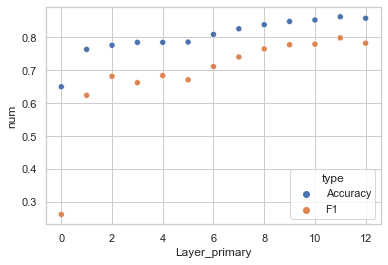

In [13]:
sns.set_style("whitegrid")
sns.scatterplot(data=df_all, x="Layer_primary", y="num", hue="type")     

<AxesSubplot:xlabel='Layer_primary', ylabel='num'>

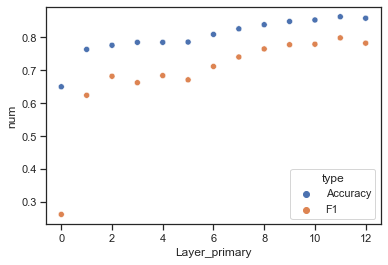

In [14]:
sns.set_style("ticks")
sns.scatterplot(data=df_all, x="Layer_primary", y="num", hue="type")

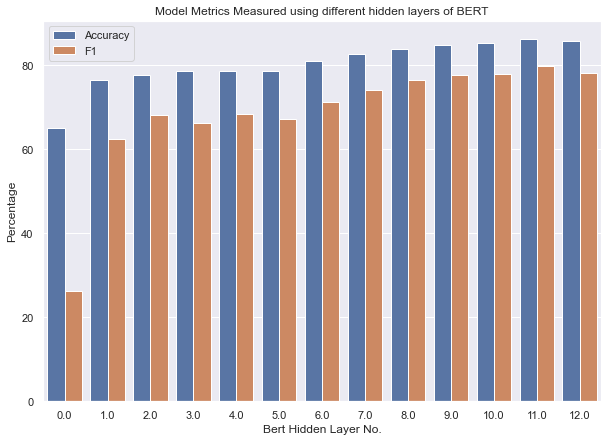

In [75]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
ax = sns.barplot(data=df_all, x="Layer_primary", y="num", hue="type")
ax.set_title("Model Metrics Measured using different hidden layers of BERT")
ax.set(xlabel='Bert Hidden Layer No.', ylabel='Percentage')
ax.legend()
plt.show()

In [69]:
df_layer = df[df['TYPE']=='Frozen']
df_accuracy = df_layer[["Frozen Percentage","Layer_primary","Accuracy "]]
df_f1 = df_layer[["Frozen Percentage","Layer_primary","F1"]]
df_accuracy['type'] = 'Accuracy'
df_f1['type'] = 'F1'
df_accuracy.rename(columns={"Accuracy ": "num"}, inplace=True)
df_f1.rename(columns={"F1": "num"}, inplace=True)
df_all = pd.concat([df_accuracy, df_f1])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

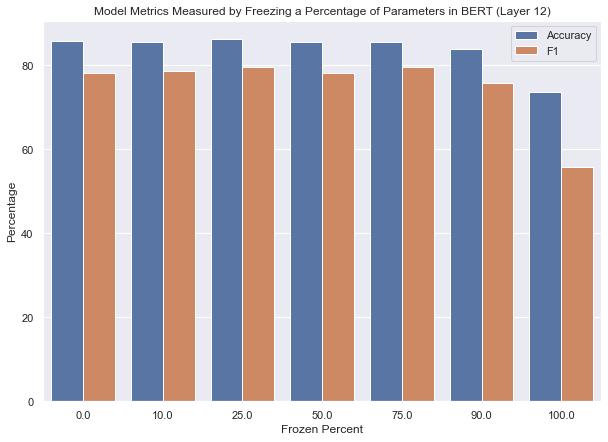

In [72]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
ax = sns.barplot(data=df_all, x="Frozen Percentage", y="num", hue="type")
ax.set_title('Model Metrics Measured by Freezing a Percentage of Parameters in BERT (Layer 12)')
ax.set(xlabel='Frozen Percent', ylabel='Percentage')
ax.legend()
plt.show()